In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

<Axes: xlabel='Time'>

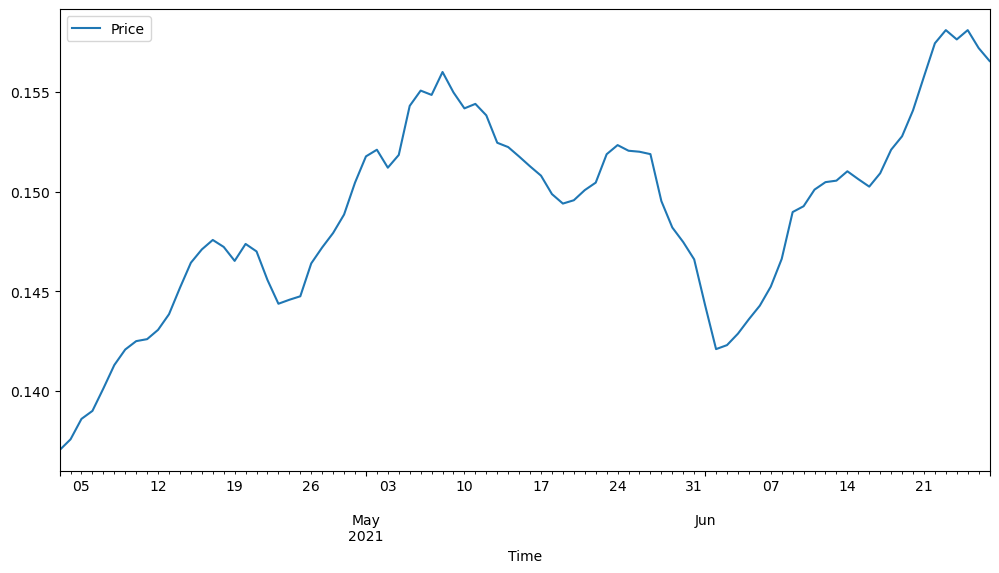

In [2]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-east-1b.csv', index_col='Time', parse_dates=True)
df.plot(figsize=(12, 6))

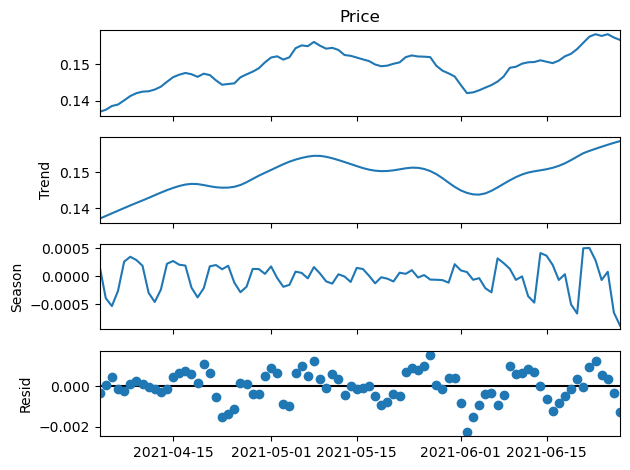

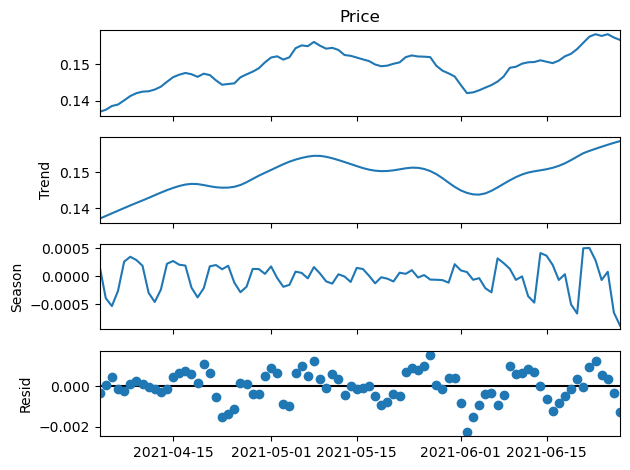

In [3]:
# Decompose the time series using STL
stl_result = STL(df['Price'], seasonal=13).fit()
stl_result.plot()

In [4]:
# Train and Test Split
train = df.iloc[:72]
test = df.iloc[72:]

In [5]:
# Extract the trend and seasonal components
trend = stl_result.trend
seasonal = stl_result.seasonal

In [6]:
# Create features for linear regression
train['trend'] = trend[:72]
train['seasonal'] = seasonal[:72]
test['trend'] = trend[72:]
test['seasonal'] = seasonal[72:]

C:\Users\kilar\AppData\Local\Temp\ipykernel_2000\583147156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['trend'] = trend[:72]
C:\Users\kilar\AppData\Local\Temp\ipykernel_2000\583147156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['seasonal'] = seasonal[:72]
C:\Users\kilar\AppData\Local\Temp\ipykernel_2000\583147156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [7]:
# Define features and target variable
features = ['trend', 'seasonal']
target = 'Price'

In [8]:
# Build and fit the Linear Regression model
model = LinearRegression()
model.fit(train[features], train[target])

# Predictions
predictions = model.predict(test[features])

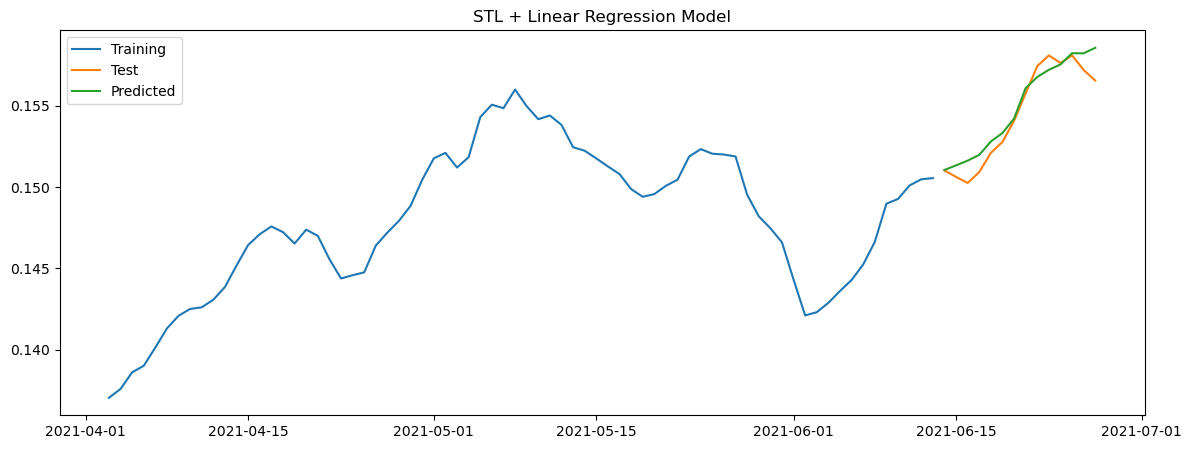

In [9]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train.index, train['Price'], label='Training')
plt.plot(test.index, test['Price'], label='Test')
plt.plot(test.index, predictions, label='Predicted')
plt.legend(loc="upper left")
plt.title('STL + Linear Regression Model')
plt.show()

In [10]:
# Evaluate the model
rmse = sqrt(mean_squared_error(test['Price'], predictions))
print("RMSE:", rmse)

RMSE: 0.000879053704489847


In [11]:
r2 = r2_score(test['Price'], predictions)
print("R^2:", r2)

R^2: 0.9130259656850337
